# Importing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import time
from statistics import mean
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
riders_data = pd.read_csv('Riders.csv')

In [3]:
# Create a copy of the DataFrame
train_df = train_data.copy()

Merge training data set with riders data set

In [121]:
df = pd.merge(train_df, riders_data, on  = 'Rider Id')

In [122]:
# Change the order of the columns to have the independent variable as the last column
df = df[['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings','Time from Pickup to Arrival']]
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602


# Exploratory  Data Analysis

Before we fit the model we need to understand how the data is structured, what variables are used and if the columns have any missing values. We need to look at how we handle missing values (drop the columns with missing values or fill in the mean depending on how many missing values the column has). We also need to look at correlations between the variables to see which variables have a strong correlation with the predictor variable as this will help us in choosing the variables to include in our model. The choice of the model to be used will depend on what we find after after exploring the dataset.

## Understanding The Data

In [61]:
# Check the statistical summary of the dataframe
df.describe() 

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,7.905797,-1.281470,36.811264,-1.282581,36.811220,1692.423706,984.742842,13.882520,341.067119,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,17.089971,0.030507,0.037473,0.034824,0.044721,1574.308302,646.652835,0.916071,402.867746,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,-1.438302,36.653621,-1.430298,36.606594,2.000000,96.000000,0.000000,0.000000,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,1.075000,-1.300921,36.784605,-1.301201,36.785661,557.000000,495.000000,13.600000,61.000000,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,2.900000,-1.279395,36.807040,-1.284382,36.808002,1212.000000,872.000000,14.000000,161.000000,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,4.900000,-1.257147,36.829741,-1.261177,36.829477,2311.000000,1236.000000,14.300000,495.000000,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,9756.000000,3764.000000,15.200000,2298.000000,7883.000000


## Dealing With Missing Data

In [11]:
# Check for null values
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [6]:
# Replace null values with the mean of the columns
# The Temperature and Precipitation columns had null values
df = df.fillna(df.mean())

Temperature and precipitation had a lot of null values, which indicates that these variables do not have that much of an impact on our model.Thus we replaced those values with the mean of the columns.

In [7]:
# One of the Rider Id rows has a missing value
# The entire row with the missing value was removed
df.dropna(inplace = True) 

In [14]:
# Check for null values again.
# There are no longer any null values
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

The dataset now has no missing values, so we can begin with our analysis.
We group data by Rider Id to show how the averages correlate. We drop all object type data.

In [8]:
# Group by Rider Id recording the mean value of each column for the riders.
df_grp = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business', 
                  'Placement - Time','Confirmation - Time','Arrival at Pickup - Time', 
                  'Pickup - Time', 'Arrival at Destination - Time' ], axis = 1)
df_grp = df_grp.groupby('Rider Id').mean()
df_grp.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
Rider Id,,,,,,,,,,,,,,,,,,,,,
Rider_Id_0,3.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,...,7.905797,-1.329285,36.886785,-1.300921,36.828195,3048.0,2570.0,14.0,512.0,1393.000000
Rider_Id_1,3.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,...,7.905797,-1.320715,36.830577,-1.299323,36.775337,8.0,589.0,0.0,1.0,1333.000000
Rider_Id_10,3.000000,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,...,7.797499,-1.310236,36.825240,-1.294703,36.800791,6978.0,1990.0,13.3,413.0,529.098039
Rider_Id_100,2.484848,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,...,7.627727,-1.281512,36.813023,-1.276978,36.814100,362.0,910.0,13.4,109.0,1271.929293
Rider_Id_101,2.469945,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,...,7.789855,-1.269583,36.803790,-1.280071,36.808981,1299.0,986.0,13.1,287.0,1755.579235


,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
Platform Type,1.000000,-0.018958,-0.091786,-0.018951,-0.091748,-0.018951,-0.091748,-0.018951,-0.091748,-0.018951,...,-0.039997,0.018723,0.041415,0.006984,0.035244,0.015274,-0.103566,-0.076152,-0.055286,0.032976
Placement - Day of Month,-0.018958,1.000000,0.002623,1.000000,0.002666,1.000000,0.002666,1.000000,0.002666,1.000000,...,-0.057245,0.030950,0.018550,-0.031019,-0.022392,0.000913,0.058926,0.068957,-0.013309,-0.084348
Placement - Weekday (Mo = 1),-0.091786,0.002623,1.000000,0.002622,0.999998,0.002622,0.999998,0.002622,0.999998,0.002622,...,-0.027884,0.042922,-0.042164,0.095851,-0.035805,-0.110124,-0.105079,-0.022697,-0.108984,0.100776
Confirmation - Day of Month,-0.018951,1.000000,0.002622,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,...,-0.057246,0.030961,0.018544,-0.031015,-0.022392,0.000912,0.058915,0.068961,-0.013317,-0.084341
Confirmation - Weekday (Mo = 1),-0.091748,0.002666,0.999998,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,...,-0.027893,0.042989,-0.042199,0.095878,-0.035806,-0.110127,-0.105141,-0.022671,-0.109029,0.100813


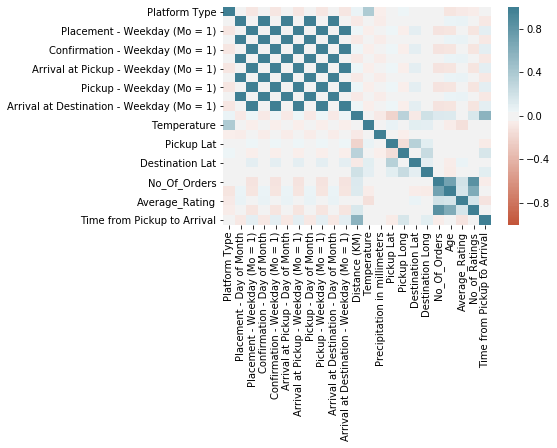

In [9]:
# Heatmap and correlation table of grouped dataset
corr = df_grp.corr()
ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n=200),  vmax = 1, vmin = -1 , center = 0 )
corr.head()

It is important to note that the correlation coefficient lies between -1 and 1. Variables with a positive
correlation are positively correlated and those with a negative correlation are negatively correlated.

## Scatter Plot Analysis and Correlation

In [9]:
# Function used to determine the slope of the best fit line
def best_fit_slope(X,y):
    m = ((mean(X) * mean(y)) - mean(X * y))/ ((mean(X)**2) - (mean(X**2)))
    return m

The line of best fit will enable us to check whether  our model is underfit,correctly fit or it is overfit

In [8]:
#Function used to determine y-intercept of best fit line
def best_fit_yintercept(X, y, m):
    b = mean(y) - (m*mean(X))
    return b

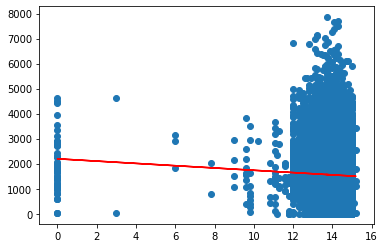

In [19]:
X = df['Average_Rating']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)
y_line = m*X + b
plt.plot(X, y_line,color = 'red')
plt.scatter(X, y)

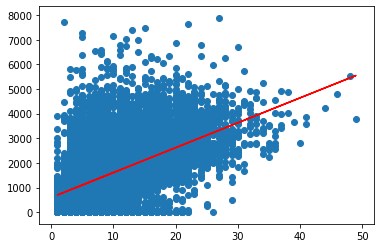

In [20]:
X = df['Distance (KM)']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)

y_line = m*X + b
plt.plot(X, y_line, color = 'red')
plt.scatter(X, y)

The line of best fit shows that a lot of our predictions are deviated from the actual values.There is also a
lot of variation in the values that were predicted.

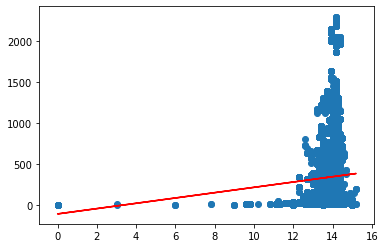

In [21]:
X = df['Average_Rating']
y = df['No_of_Ratings']
m = best_fit_slope(X, y)
b = best_fit_yintercept(X, y, m)

y_line = m*X + b
plt.plot(X, y_line, color='red')
plt.scatter(X, y)

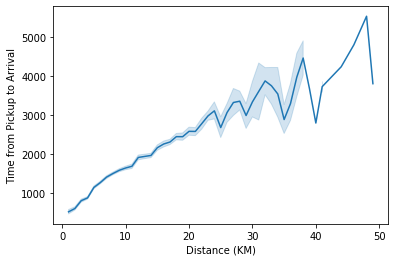

In [88]:
sns.lineplot(df['Distance (KM)'], df['Time from Pickup to Arrival'])

We can see that there is a strong correlation between the Distance and the Time from pickup to arrival.

## Box Plot Analysis

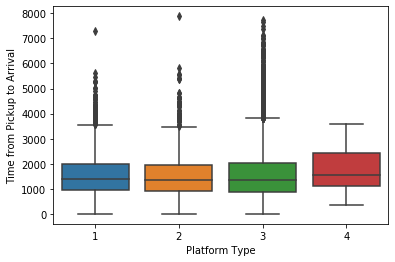

In [22]:
sns.boxplot( x = 'Platform Type', y = 'Time from Pickup to Arrival', data = df)

This boxplot shows that the average time each delivery took is the same for every platform, therefore using this variable in our regression model would not benefit it.

## Residual Plot Analysis

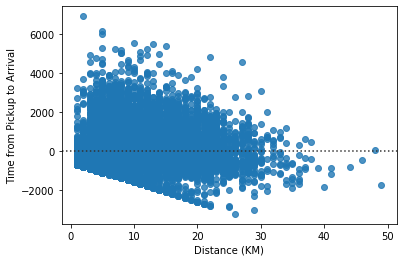

In [23]:
# If residuals are randomly spread out around x-axis then a linear model is appropriate.
# Not randomly spread around the x-axis means linear model is not appropriate. Non-linear model may be appropriate.

sns.residplot(df['Distance (KM)'], df['Time from Pickup to Arrival'])

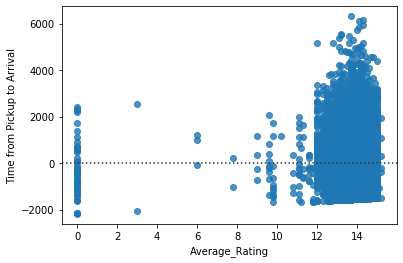

In [24]:
sns.residplot(df['Average_Rating'], df['Time from Pickup to Arrival'])

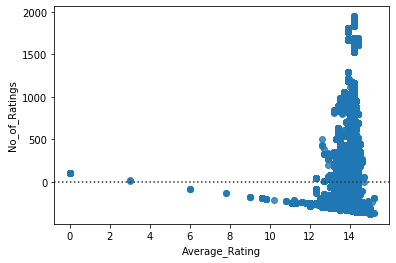

In [25]:
sns.residplot(df['Average_Rating'], df['No_of_Ratings'])

Signs of heteroscedascity can be seen in the residual plots. Nonlinear models are appropriate for these relationships.

## Time Analysis

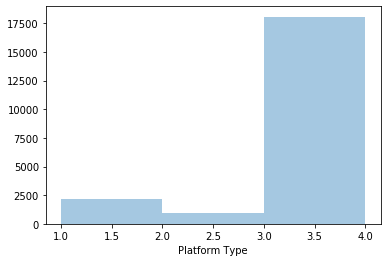

In [27]:
sns.distplot(df['Platform Type'], kde = False, bins = 3)

The most popular platform type through which orders are placed in platform 3

We extract the time from the time columns and determine the hour when each order was placed, confirmed and picked up

In [123]:
# Change columns with time to have datetime data types
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'], infer_datetime_format=True)
df['Placement - Time'] = pd.to_datetime(df['Placement - Time'], infer_datetime_format=True)
df['Confirmation - Time'] = pd.to_datetime(df['Confirmation - Time'], infer_datetime_format=True)
df['Arrival at Pickup - Time'] = pd.to_datetime(df['Arrival at Pickup - Time'], infer_datetime_format=True)


# Extract the hour when each order was placed
pickup_hour = df['Pickup - Time']
placement_hour = df['Placement - Time']
confirmation_hour = df['Confirmation - Time']
arrival_hour = df['Arrival at Pickup - Time']

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null datetime64[ns]
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null datetime64[ns]
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at 

In [125]:
# Determine the time between each phase of the order in seconds
df['Placement - Confirmation Time'] = (df['Confirmation - Time'] - df['Placement - Time'])/np.timedelta64(1, 's')
df['Confirmation - Pickup Time'] = (time_df['Pickup - Time'] - df['Placement - Time'])/np.timedelta64(1, 's')

#Remove the date in the column to only show the time stamp
df['Pickup - Time'] = df['Pickup - Time'].dt.time
df['Placement - Time'] = df['Placement - Time'].dt.time
df['Confirmation - Time'] = df['Confirmation - Time'].dt.time

#Rearrange the columns and group similar columns together   
df = df[['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Placement - Confirmation Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Confirmation - Pickup Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival']]
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,15:41:17,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549,2886
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549,2615
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,07:12:10,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549,2986
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549,1602


We analyse the time data to see if there are differences depending on what time an order was placed. We look at the times when most orders are placed and the time between each stage that an order goes through (placement, confirmation, pickup).

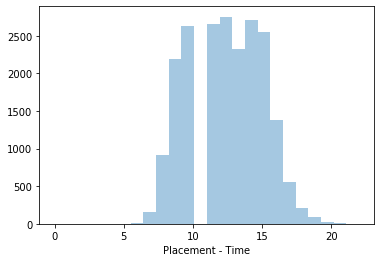

In [71]:
sns.distplot(placement_hour.dt.hour, kde = False, bins=24)

[Text(0, 0.5, 'Time from placemnt to confirmation (seconds)'),
 Text(0.5, 0, 'Order placement hour')]

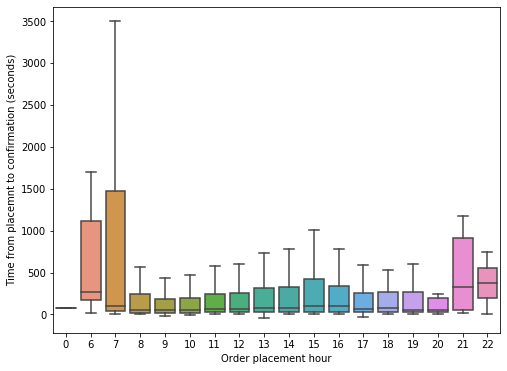

In [126]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot( x =placement_hour.dt.hour , y = 'Placement - Confirmation Time', data = df, showfliers=False)
ax.set(xlabel='Order placement hour', ylabel = 'Time from placemnt to confirmation (seconds)')

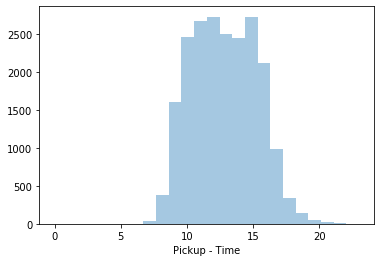

In [72]:
sns.distplot(pickup_hour.dt.hour, kde = False, bins=24)

[Text(0, 0.5, 'Time from placement to pickup (seconds)'),
 Text(0.5, 0, 'Order confirmation hour')]

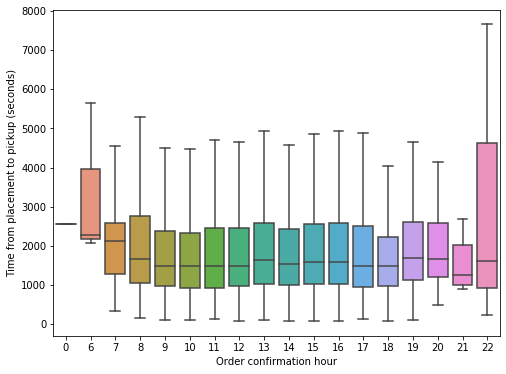

In [127]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax =sns.boxplot( x = confirmation_hour.dt.hour, y = 'Confirmation - Pickup Time', data = df, showfliers=False)
ax.set(xlabel='Order confirmation hour', ylabel = 'Time from placement to pickup (seconds)')

[Text(0, 0.5, 'Time from Pickup to Arrival'), Text(0.5, 0, 'Pickup hour')]

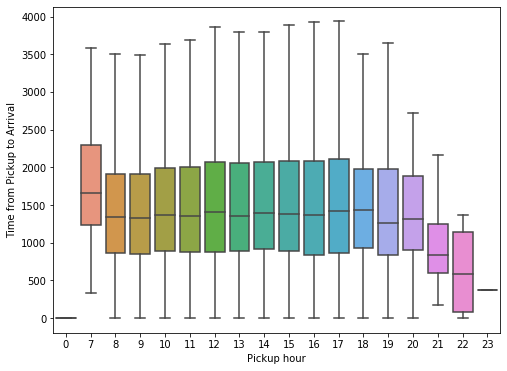

In [128]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax =sns.boxplot( x = pickup_hour.dt.hour, y = 'Time from Pickup to Arrival', data = df, showfliers=False)
ax.set(xlabel='Pickup hour', ylabel = 'Time from Pickup to Arrival')

## Summary

We joined the training dataset and the riders dataset to get a better sense of the process that happens from the time an order is placed to the time it is delivered to the customer. We found that most orders are placed using platfrom 3 between 10 AM and 3 PM and on average it takes 1556 seconds (25 minutes) for the driver to make a delivery to the customer. Orders are mostly picked up within the same time frame. The average distance travelled by a driver to make a delivery is 9.5 KM. Since the dataset only includes bikes it was difficult to determine if there is a difference between the time from pickup to arrival based on the mode of transport used by a driver.

We analysed the time between each stage that an order goes through (placement, confirmation, pickup) because this can influence the time it takes for an order to be delivered from the point of pickup. In analysing the time taken from placement to confirmation and confirmation to pickup, we can determine if there are inefficiencies that affect the delivery time. from the analysis we see that the confirmation is generally the same throughout the day, and it is longer if an order is placed before 7 AM and after 8 PM. After 8 AM the time from order placement to pickup is the same, it takes longer for orders places in the early hours of the morning to get picked up. As the day progresses the time for delivery stays the same, and orders are delivered faster after 8 PM.

Missing values in the dataframe were filled using the mean of the column. The descision for columns to include in training the model was based on correlation and the column chosen was the Distance column since it has the highest correlation to the response variable(Time from pickup to arrival). 

We will start by training various models and in the end we will use the model with the lowest RMSE.

# Pre-processing
## Shaping and Forming x and y

In [39]:
train_df = train_data[['Distance (KM)', 'Time from Pickup to Arrival']]

In [40]:
# Create the X and y variables from the dataset
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [41]:
# Re-shape x and y into a 2D array
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
print(x,y)
print("\n This is the correct form for the variables")

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]] [[ 745]
 [1993]
 [ 455]
 ...
 [2953]
 [1380]
 [2128]]

 This is the correct form for the variables


## Scaling

In [42]:
# We need to scale the data 
# We will use Sklean's StandardScaler for this

sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

print(x,y)
print("\n Variables scaled correctly")

[[-0.97137039]
 [ 1.14546888]
 [-1.14777366]
 ...
 [ 1.85108197]
 [ 0.61625906]
 [ 0.43985579]] [[-0.82240871]
 [ 0.44171198]
 [-1.11615471]
 ...
 [ 1.41411252]
 [-0.17920627]
 [ 0.57845581]]

 Variables scaled correctly


# SVR Model
### Our first attempt will be to try and use an SVR model
## Training

In [43]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting  

In [44]:
predicts = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(x)))

In [45]:
from sklearn.metrics import mean_squared_error
print("RMSE: ", np.sqrt(mean_squared_error(y,predicts)))

RMSE:  448.35600656558495


# Random Forest Regressor
## Pre-Processing

In [46]:
tr_df = train_data.copy()

tr_df1 = tr_df.drop(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
                     'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
                     'Pickup - Time', 'Arrival at Destination - Time', 'Precipitation in millimeters',
                     'Temperature', 'Rider Id', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
                     'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month'], axis=1)

In [47]:
ts_df = test_data.copy()

ts_df1 = ts_df.drop(['Order No', 'User Id', 'Vehicle Type','Personal or Business' ,
                     'Placement - Time', 'Confirmation - Time','Arrival at Pickup - Time', 
                     'Pickup - Time', 'Precipitation in millimeters', 'Temperature', 'Rider Id',
                     'Pickup Lat','Pickup Long', 'Destination Lat','Destination Long' ], axis=1)
ts_df1['Time from pickup to arrival'] = range(len(ts_df['Platform Type']))

predvar = ts_df1.iloc[:, -2:-1].values

In [48]:

rf_X = tr_df1.iloc[: , -2:-1].values
rf_y = tr_df1.iloc[: , -1].values

In [49]:
rf_X = rf_X.reshape(-1,1)
rf_y= rf_y.reshape(-1,1)

rf_X = sc_X.fit_transform(rf_X)
rf_y = sc_y.fit_transform(rf_y)

## Training

In [50]:
from sklearn.ensemble import RandomForestRegressor

regressorRFR = RandomForestRegressor()
regressorRFR.fit(rf_X, rf_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Predicting

In [51]:
RFRpreds = sc_y.inverse_transform(regressorRFR.predict(sc_X.transform(predvar)))
print("RMSE: ", np.sqrt(mean_squared_error(predvar,RFRpreds)))

RMSE:  1649.158033862915


# Linear Model

## Training

In [52]:
# No need to pre-process the data this time as it has already been pre-processed to the desired from
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predicts_lin = sc_y.inverse_transform(regressor.predict(sc_X.transform(x)))

from sklearn import metrics

print("RMSE: ", np.sqrt(mean_squared_error(y,predicts_lin)))

RMSE:  604.0926975240304


# Summary

As we can see the model with the best fit is the random forest regressor this is the model we will use to build our API and can predict Values closely resembling the actual values.
We will use that model to convert into a csv

### Submitting to Zindi, creating an CSV file
#### Don't run this code if not wanting to create a CSV file

In [54]:
# Run this code only if wanting to create a CSV, we did this so we could submit to Zindi

ts_df['Time from pickup to arrival'] = RFRpreds
newer = ts_df[['Order No', 'Time from pickup to arrival']]
newer.to_csv("28_Predict.csv", index=False)
newer

,Order No,Time from pickup to arrival
0,Order_No_19248,1497.543375
1,Order_No_12736,1140.790656
2,Order_No_768,1140.790656
3,Order_No_15332,1140.790656
4,Order_No_21373,1259.017079
5,Order_No_14573,2255.176948
6,Order_No_6731,2467.338667
7,Order_No_18436,1497.543375
8,Order_No_2288,1497.543375
9,Order_No_9063,2141.730104
